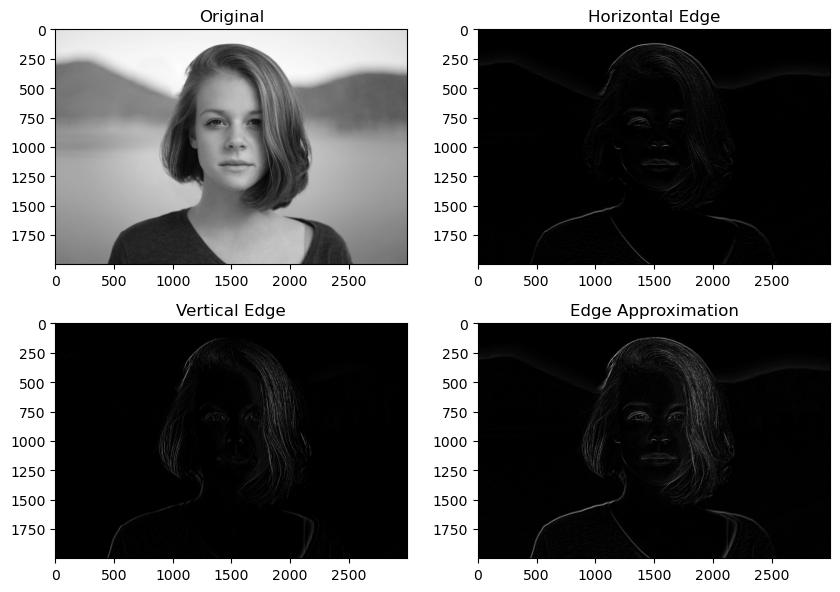

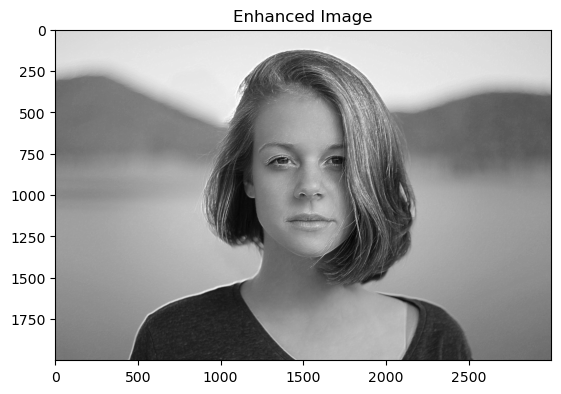

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

IMG_PATH = './images/'
IMG_NAME = 'girl.jpeg'
# Load the image in grayscale
obama = cv2.imread(IMG_PATH +IMG_NAME, cv2.IMREAD_GRAYSCALE)
if obama is None:
    print("Image not found. Please check the filename or path.")
else:
    # Define Sobel filters
    sobel_horizontal = np.array([[1, 2, 1],
                                 [0, 0, 0],
                                 [-1, -2, -1]])

    sobel_vertical = np.array([[1, 0, -1],
                               [2, 0, -2],
                               [1, 0, -1]])

    # Apply horizontal and vertical Sobel filters using cv2.filter2D
    obama_horizontal = cv2.filter2D(obama, -1, sobel_horizontal)
    obama_vertical = cv2.filter2D(obama, -1, sobel_vertical)

    # Display images with Matplotlib
    plt.figure(figsize=(10, 7))
    plt.subplot(221)
    plt.imshow(obama, cmap='gray')
    plt.title('Original')
    
    plt.subplot(222)
    plt.imshow(obama_horizontal, cmap='gray')
    plt.title('Horizontal Edge')

    plt.subplot(223)
    plt.imshow(obama_vertical, cmap='gray')
    plt.title('Vertical Edge')

    # Calculate the approximation of edges
    obama_approximation = np.abs(obama_vertical) + np.abs(obama_horizontal)
    plt.subplot(224)
    plt.imshow(obama_approximation, cmap='gray')
    plt.title('Edge Approximation')

    plt.show()

    # Adding the approximation to the original image and displaying it
    enhanced_obama = cv2.add(obama, np.uint8(obama_approximation))
    plt.figure()
    plt.imshow(enhanced_obama, cmap='gray')
    plt.title('Enhanced Image')
    plt.show()
